In [10]:
import numpy as np
import pandas as pd
from numpy import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS ON UNICORN COMPANIES



In [11]:
df = pd.read_csv(r'C:\Users\Hello\Desktop\Quantum Analytics\Python\Assignment\Unicorn_Companies.csv')
df

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


## Data Cleaning / Wrangling Processes
- replacing NaN values in the City column with it's actual city location
- replacing NaN values for 'Select Investors' with the actual investors
- research and replace Unknown values for 'Funding' with the actual values
- check for duplicates
- check for wrong format entries
- replace the wrong 'Year Founded' Date for the company Yidian Zixun

In [3]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [4]:
df[df.City.isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [12]:
df.loc[df.Company == 'FTX', 'City'] = df.loc[df.Company == 'FTX', 'City'].replace(np.NaN, 'Nassau', regex=True)
df.loc[df.Company == 'HyalRoute', 'City'] = df.loc[df.Company == 'HyalRoute', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Moglix', 'City'] = df.loc[df.Company == 'Moglix', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Trax', 'City'] = df.loc[df.Company == 'Trax', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Amber Group', 'City'] = df.loc[df.Company == 'Amber Group', 'City'].replace(np.NaN, 'Hong Kong', regex=True)
df.loc[df.Company == 'Ninja Van', 'City'] = df.loc[df.Company == 'Ninja Van', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Advance Intelligence Group', 'City'] = df.loc[df.Company == 'Advance Intelligence Group', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Carousell', 'City'] = df.loc[df.Company == 'Carousell', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Matrixport', 'City'] = df.loc[df.Company == 'Matrixport', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'bolttech', 'City'] = df.loc[df.Company == 'bolttech', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Carro', 'City'] = df.loc[df.Company == 'Carro', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'Cider', 'City'] = df.loc[df.Company == 'Cider', 'City'].replace(np.NaN, 'Hong Kong', regex=True)
df.loc[df.Company == 'NIUM', 'City'] = df.loc[df.Company == 'NIUM', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'ONE', 'City'] = df.loc[df.Company == 'ONE', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'PatSnap', 'City'] = df.loc[df.Company == 'PatSnap', 'City'].replace(np.NaN, 'Singapore', regex=True)
df.loc[df.Company == 'WeLab', 'City'] = df.loc[df.Company == 'WeLab', 'City'].replace(np.NaN, 'Hong Kong', regex=True)

In [75]:
df[df['Select Investors'].isnull()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [13]:
# replace the NaN values in Select Investors for LinkSure Network
df.loc[df.Company == 'LinkSure Network', 'Select Investors'] = df.loc[df.Company == 'LinkSure Network', 'Select Investors'].replace(np.NaN, 'Bank of China, Eight Roads, O.A.G.M, Primavera Capital Group, Cheetah Mobile', regex=True)

In [8]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [14]:
# replacing unknowns found in Funding with with researched value or $50.1M when undisclosed
df.loc[df.Company == 'Uplight', 'Funding'] = df.loc[df.Company == 'Uplight', 'Funding'].replace('Unknown', '$227.8M', regex=True)
df.loc[df.Company == 'SSENSE', 'Funding'] = df.loc[df.Company == 'SSENSE', 'Funding'].replace('Unknown', '$4B', regex=True)
df.loc[df.Company == 'SITECH DEV', 'Funding'] = df.loc[df.Company == 'SITECH DEV', 'Funding'].replace('Unknown', '$0M', regex=True)
df.loc[df.Company == 'Xiaobing', 'Funding'] = df.loc[df.Company == 'Xiaobing', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Veepee', 'Funding'] = df.loc[df.Company == 'Veepee', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'DistroKid', 'Funding'] = df.loc[df.Company == 'DistroKid', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Assembly', 'Funding'] = df.loc[df.Company == 'Assembly', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Carson Group', 'Funding'] = df.loc[df.Company == 'Carson Group', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Iodine Software', 'Funding'] = df.loc[df.Company == 'Iodine Software', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Kendra Scott', 'Funding'] = df.loc[df.Company == 'Kendra Scott', 'Funding'].replace('Unknown', '$50.1M', regex=True)
df.loc[df.Company == 'Poizon', 'Funding'] = df.loc[df.Company == 'Poizon', 'Funding'].replace('Unknown', '$50M', regex=True)
df.loc[df.Company == 'ISN', 'Funding'] = df.loc[df.Company == 'ISN', 'Funding'].replace('Unknown', '$50.1M', regex=True)

In [6]:
df[(df['Funding'] == 'Unknown')].Funding.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Funding, dtype: object

In [33]:
# results gotten from analysing the duration of companies before attaining unicorn status gave a value of (-4) for the company Yidian Zixun. So check for inconsistencies in the data
df[(df['Company'] == 'Yidian Zixun')].groupby(['Year Founded', 'Date Joined']).agg('mean')

,,NumericValuation,NumericFunding,ROI(%),Duration(Years)
Year Founded,Date Joined,,,,
2012-01-01,2017-10-17,1.000000e+09,151000000.0,84.9,-4.0


Wrong Date for "Year Founded": Founded in 2021 but became a Unicorn in 2017

In [35]:
# correct the date for company Yidian Zixun
df.loc[df.Company == 'Yidian Zixun', 'Year Founded'] = df.loc[df.Company == 'Yidian Zixun', 'Year Founded'].astype(str).replace('2021-01-01', '2012-01-01', regex=True)

In [189]:
# check for duplicates
df.duplicated().sum()

0

In [119]:
#display(df.to_string())

# Analysis
- First we create numeric versions of columns in order to perform desired analysis

In [18]:
# creating numeric version of the column 'Valuation' for analysis
def extract_numeric_value(value):
    if value[-1] == 'B':
        numeric_value = int(''.join(filter(str.isdigit, value[:-1]))) * 1000000000
    elif value[-1] == 'M':
        numeric_value = int(''.join(filter(str.isdigit, value[:-1]))) * 1000000
    else:
        numeric_value = 0  # or any default value if needed
    return numeric_value

# Storing data in 'df'
df['NumericValuation'] = df['Valuation'].apply(extract_numeric_value)

In [19]:
# creating numeric version of the column 'Funding' for analysis
def extract_numeric_value(value):
    if value[-1] == 'B':
        numeric_value = int(''.join(filter(str.isdigit, value[:-1]))) * 1000000000
    elif value[-1] == 'M':
        numeric_value = int(''.join(filter(str.isdigit, value[:-1]))) * 1000000
    else:
        numeric_value = 0 
    return numeric_value

# Storing data in 'df'
df['NumericFunding'] = df['Funding'].apply(extract_numeric_value)

In [9]:
df.head().sort_values(by = 'NumericValuation', ascending = False)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,NumericValuation,NumericFunding
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",180000000000,8000000000
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100000000000,7000000000
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",100000000000,2000000000
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",95000000000,2000000000
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",46000000000,4000000000


### 1. Top 10 Companies with the highest Return on Investment(ROI)

In [20]:
# now we calculate the Return on Investment(ROI) of each company in order to see who benefitted the most
df['ROI(%)'] = round(((df.NumericValuation - df.NumericFunding)/df.NumericValuation) * 100, 2)

In [21]:
df.nlargest(10, columns='ROI(%)')

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,NumericValuation,NumericFunding,ROI(%)
189,Otto Bock HealthCare,$4B,2017-06-24,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners,4000000000,0,100.00
639,SITECH DEV,$1B,2019-05-16,Other,Guiyang,China,Asia,2017,$0M,China Prosperity Capital,1000000000,0,100.00
239,Zapier,$4B,2021-01-14,Internet software & services,Sunnyvale,United States,North America,2011,$1M,"Sequoia Capital, Bessemer Venture Partners, Th...",4000000000,1000000,99.98
61,Dunamu,$9B,2021-07-22,Fintech,Seoul,South Korea,Asia,2012,$71M,"Qualcomm Ventures, Woori Investment, Hanwha In...",9000000000,71000000,99.21
792,Workhuman,$1B,2020-06-23,Internet software & services,Dublin,Ireland,Europe,1999,$9M,ICG,1000000000,9000000,99.10
361,CFGI,$2B,2021-09-15,Fintech,Boston,United States,North America,2000,$19M,"The Carlyle Group, CVC Capital Partners",2000000000,19000000,99.05
743,Manner,$1B,2020-12-24,Other,Shanghai,China,Asia,2015,$10M,"Coatue Management, H Capital, Capital Today",1000000000,10000000,99.00
72,DJI Innovations,$8B,2015-01-23,Hardware,Shenzhen,China,Asia,2006,$105M,"Accel Partners, Sequoia Capital",8000000000,105000000,98.69
760,GalaxySpace,$1B,2020-11-17,Mobile & telecommunications,Beijing,China,Asia,2016,$14M,"Shunwei Capital Partners, 5Y Capital, Legend C...",1000000000,14000000,98.60
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",40000000000,572000000,98.57


In [84]:
# df_filtered = df[(df['Funding'] != 'Unknown')]
# top_10_roi = df_filtered.nlargest(5, columns='ROI(%)')

In [23]:
ROI = df.nlargest(10, columns='ROI(%)')
ROI[['Company', 'ROI(%)']].value_counts()

Company               ROI(%)
CFGI                  99.05     1
Canva                 98.57     1
DJI Innovations       98.69     1
Dunamu                99.21     1
GalaxySpace           98.60     1
Manner                99.00     1
Otto Bock HealthCare  100.00    1
SITECH DEV            100.00    1
Workhuman             99.10     1
Zapier                99.98     1
dtype: int64

In [24]:
ROI.groupby(['Company'])['ROI(%)'].agg('mean').sort_values(ascending = False)

Company
Otto Bock HealthCare    100.00
SITECH DEV              100.00
Zapier                   99.98
Dunamu                   99.21
Workhuman                99.10
CFGI                     99.05
Manner                   99.00
DJI Innovations          98.69
GalaxySpace              98.60
Canva                    98.57
Name: ROI(%), dtype: float64

In [25]:
ROI_Plot = ROI[['Company', 'ROI(%)']].value_counts()

<AxesSubplot:title={'center':"Top 10 Companies' ROI(%)"}, ylabel='.'>

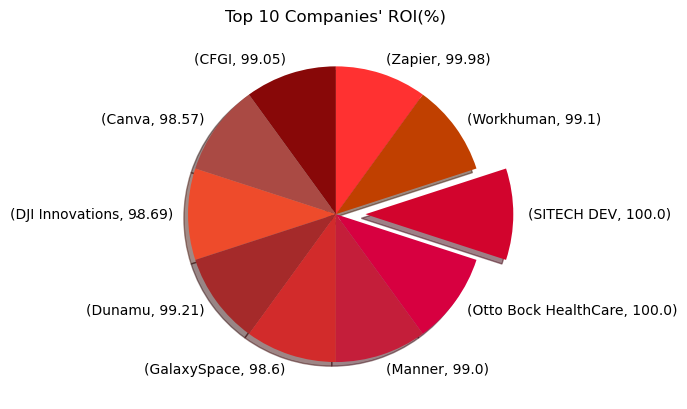

In [161]:
mycolors = ["#880808", "#AA4A44", "#EE4B2B", "#A52A2A", "#D22B2B", "#C41E3A", "#D70040", "#D2042D", "#C04000", "#FF3131"]

explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0]

ROI_Plot.plot(kind = 'pie', colors = mycolors, explode = explode, shadow = True, startangle = 90, title = "Top 10 Companies' ROI(%)", label = '.')

### Observation:
- Otto Bock Healthcare and SITECH DEV came out on top in terms of Return on Investment recorded (100% : at $0 funding). That being said, there are uncertainties around the latter as its funding was previously recorded as unknown. But with further research, it was speculated that it is yet to receive any funding till date (Ref: Tracxn Technologies Private Limited, May 31, 2021) 

### ---------------------------------------------------------------------------------------------------------------------------------------------------

## 2. How Long It Takes For a Company To Become A Unicorn

In [136]:
# Checking the data types
df['Year Founded'].dtype

dtype('int64')

In [140]:
df['Date Joined'].dtype

dtype('O')

In [36]:
import pandas as pd

# convert the datatype to datetime
df['Date Joined'] = pd.to_datetime(df['Date Joined'], format='%Y-%m-%d')
df['Year Founded'] = pd.to_datetime(df['Year Founded'], format='%Y', errors='coerce')

In [37]:
df['Duration(Years)'] = df['Date Joined'].dt.year - df['Year Founded'].dt.year

In [38]:
df[['Company', 'Duration(Years)']].sort_values(by = 'Duration(Years)', ascending = False).head(10)

,Company,Duration(Years)
189,Otto Bock HealthCare,98
373,Promasidor Holdings,37
699,Five Star Business Finance,37
1043,Thirty Madison,28
840,Radius Payment Solutions,27
11,Epic Games,27
129,Howden Group Holdings,26
79,Caris Life Sciences,25
377,BGL Group,25
360,Carzone,24


In [39]:
ax = df[['Company', 'Duration(Years)']].sort_values(by = 'Duration(Years)', ascending = False).head(10)

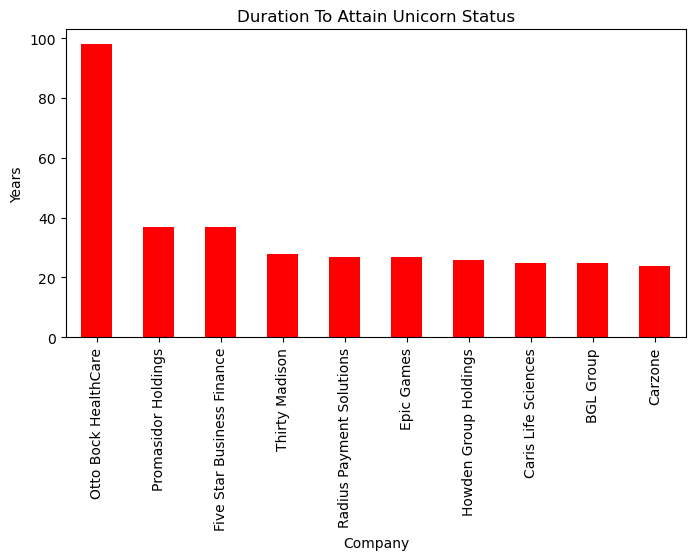

In [242]:
ax.plot.bar('Company', figsize = (8, 4), title = 'Duration To Attain Unicorn Status', legend = False, ylabel = 'Years', color = 'r')

# annotations
#ax.bar_label(ax.container[0], label_type = 'edge')

plt.show()

### Observation:
- Some companies took quite a long time to attain the level of a Unicorn Company (USD 1 billion valuation), for example; Otto Bock HealthCare took 98 years to achieve this feat but Avant didn't take up to a year. There are reasons for the timing in being refered to as a Unicorn Company:
 1. Tech is the fastest route to success and achieving the tag of a unicorn for most companies in this new age. Tech companies nowadays attain billion dollar valuation within a year after their inauguration - Avant for example.
 2. Pertaining to the term "Unicorn" literally; it was not used in refering to billion dollar companies, not until 2013, when it was first coined by a venture capitalist Aileen Lee. The first Billion dollar company was the United States Steel Corporation in 1901 at a valuation of USD 1.4 billion, but it wasn't refered as a Unicorn at that time.

## 3. Fastest Companies To Attain Billion Dollar Valuation(Unicorn Companies)

In [40]:
df[['Company', 'Duration(Years)']].sort_values(by = 'Duration(Years)', ascending = True).head(10)

,Company,Duration(Years)
775,Jokr,0
546,Avant,0
554,ClickHouse,0
314,Flink Food,0
822,GlobalBees,0
1001,Playco,0
161,Ola Electric Mobility,0
967,Mensa Brands,0
396,candy.com,0
102,Black Unicorn Factory,1


# Observation:
- It took Jokr and eight(8) other companies less than a year to achieve the Unicorn milestone, making them the fastest companies to achieve this feat in this list.
- Avant for example is an Artifical Intelligence company that was launched in November 2022, that then became a Unicorn before December that year. 
- All of these companies have achieved the feat of a Unicorn as a result of being a Tech company or heavily incorporated Technology in their services. 

## 4. Countries And Cities With The Most Unicorns

In [22]:
# count of Unicorns per country
df.Country.value_counts()

United States           562
China                   173
India                    65
United Kingdom           43
Germany                  26
France                   24
Israel                   20
Canada                   19
Brazil                   16
Singapore                12
South Korea              12
Australia                 8
Hong Kong                 6
Mexico                    6
Indonesia                 6
Netherlands               6
Sweden                    6
Switzerland               5
Japan                     5
Ireland                   5
Finland                   4
Norway                    4
United Arab Emirates      3
Turkey                    3
Spain                     3
Belgium                   3
Chile                     2
South Africa              2
Philippines               2
Thailand                  2
Estonia                   2
Vietnam                   2
Austria                   2
Colombia                  2
Denmark                   2
Argentina           

### Observation:
- The United states with a wide margin clinches the top spot having 562 Unicorn companies, whilst China trail right behind with 173 Unicorns.
- Nigeria and 10 other countries share the least number of Unicorn Companies it possesses(one(1) Unicorn).

### Top 5 Tech Hub Cities

In [23]:
df.City.value_counts().head()

San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Name: City, dtype: int64

In [24]:
Tech_Hubs = df.City.value_counts().head()

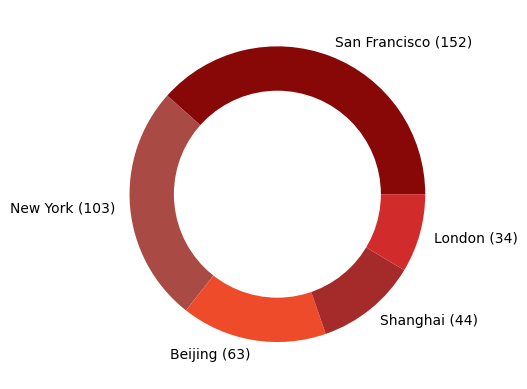

In [25]:
label = ['San Francisco (152)', 'New York (103)', 'Beijing (63)', 'Shanghai (44)', 'London (34)']
mycolors =["#880808", "#AA4A44", "#EE4B2B", "#A52A2A", "#D22B2B"]

plt.pie(Tech_Hubs, labels = label, colors = mycolors)

# draw a circle
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()

# Adding the circle
fig.gca().add_artist(centre_circle)

plt.show()

### Observation:
- San Francisco and New York, United States of America are the top 2 biggest Tech spaces in the world - Having 152 and 103 number of Tech companies respectively. Tech Companies in both cities combined(255) is more than the rest of the top 5 cummulatively.

## 5. Investor(s) Who Funded The Most Unicorns

In [106]:
df['Select Investors'].value_counts().head(20)

Sequoia Capital                                                                                3
Speedinvest, Valar Ventures, Uniqa Ventures                                                    2
General Atlantic                                                                               2
Sequoia Capital China, Qiming Venture Partners, Tencent Holdings                               2
Global Founders Capital, Shea Ventures, Greycroft                                              2
Greylock Partners, Google Ventures, BlackRock                                                  2
SoftBank Group                                                                                 2
Insight Partners, Sequoia Capital, Index Ventures                                              2
Undisclosed                                                                                    2
Qualcomm Ventures, Accel, Canaan Partners                                                      2
Shunwei Capital Partners, Chin

### Observation:
- Sequoia Capital, alongside 13 other investors are recorded to have made financial commitments and partnership with with more than one(1) Unicorn companies. Sequoia Capital with the highest number of investments, numbered three(3).

## 6. Companies the Top Investor Invested In(Continued)

In [104]:
df[(df['Select Investors'] == 'Sequoia Capital')].groupby(['Select Investors', 'Company']).NumericFunding.sum()

Select Investors  Company
Sequoia Capital   MUSINSA     287000000
                  Retool       96000000
                  SSENSE     4000000000
Name: NumericFunding, dtype: int64

### Observation: 
- From analysis, Sequoia Capital was found to be the most frequent investor by investing in three(3) Unicorn Companies. The companies and the amount invested is listed below: 
    1. MUSINSA - USD287 Million
    2. Retool  - USD96 Million
    3. SSENSE  - USD4 Billion
- It is important to note that according to the data, they may not be the sole investors of the said monies, but are seen to be the most frequent of investors amongst the list of Unicorn Companies.

## 7. Investors With The Most Money Invested 

In [64]:
df.groupby(['Select Investors'])['NumericFunding'].sum().nlargest(n = 5)

Select Investors
Tiger Global Management                                                    14000000000
Sequoia Capital China, SIG Asia Investments, Sina Weibo, Softbank Group     8000000000
Founders Fund, Draper Fisher Jurvetson, Rothenberg Ventures                 7000000000
Tencent Holdings, KKR, Smash Ventures                                       7000000000
Accel India, SAIF Partners, Norwest Venture Partners                        5000000000
Name: NumericFunding, dtype: int64

In [65]:
big_cash = df.groupby(['Select Investors'])['NumericFunding'].sum().nlargest(n = 5)

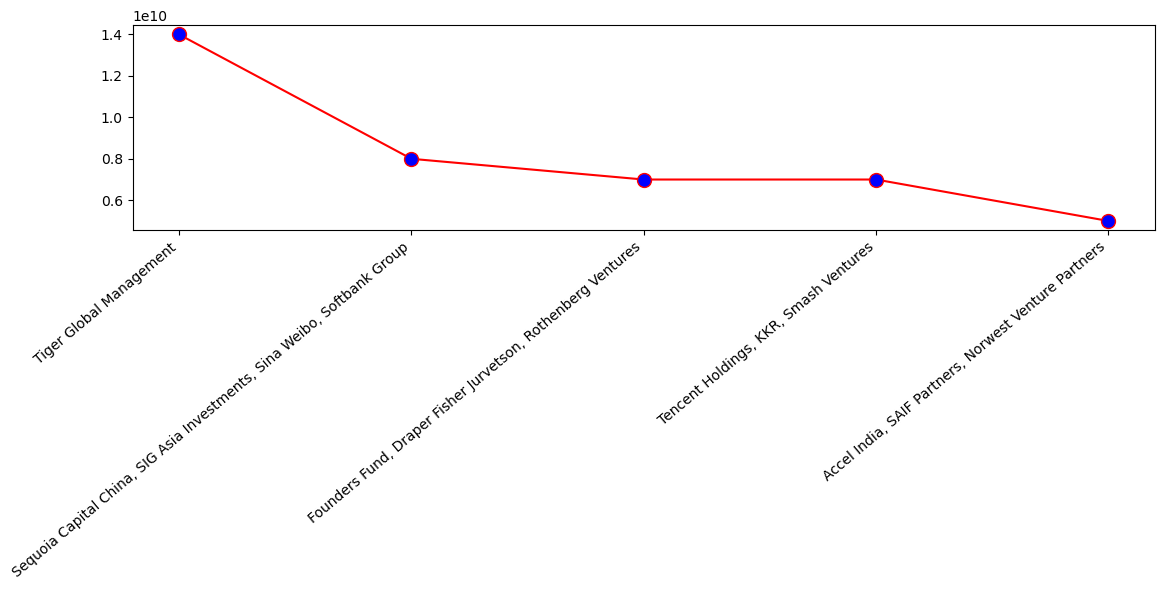

In [215]:
plt.figure(figsize=(12, 6))
plt.plot(big_cash, marker='o', ms=10, color='r', mfc='b')

plt.xticks(rotation=40, ha='right')
plt.tight_layout()

# plt.title("Top Spenders")

plt.show()

### Observation:
- Tiger Global Management are the Top Spenders in the list of investments to the Unicorn Companies, at a staggering sum of USD14 Billion. They are just directly atop the most frequent investors in the list; Sequoia Capital China. 

## 8. The Companies That Received the Biggest Funding and Their Return on Investment

In [207]:
df.groupby('Company')[['NumericFunding', 'ROI(%)']].agg('mean').nlargest(n=5, columns= 'NumericFunding').astype('int64')

,NumericFunding,ROI(%)
Company,,
JUUL Labs,14000000000,63
Bytedance,8000000000,95
Epic Games,7000000000,78
SpaceX,7000000000,93
Global Switch,5000000000,54


In [208]:
Fund = df.groupby('Company')[['NumericFunding', 'ROI(%)']].agg('mean').nlargest(n=5, columns= 'NumericFunding').astype('int64')

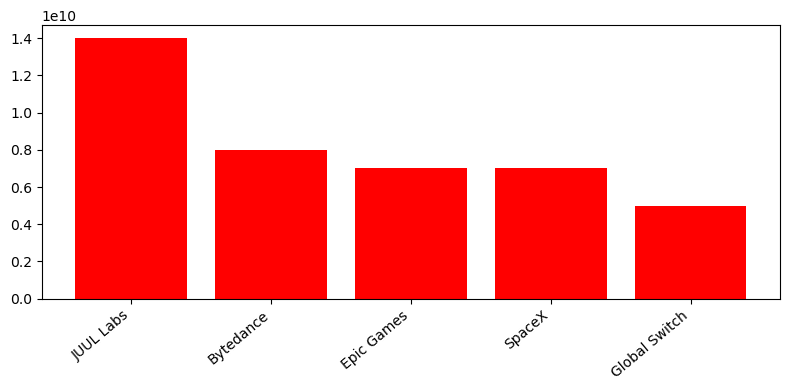

In [225]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(x=Fund.index, height=Fund['NumericFunding'], color='r')

plt.xticks(rotation=40, ha='right')
plt.tight_layout()

plt.show()

## 9. Companies with the worst ROI


In [47]:
df.groupby('Company')[['NumericFunding', 'ROI(%)']].agg('mean').nsmallest(n=15, columns= 'ROI(%)').astype('int64')

,NumericFunding,ROI(%)
Company,,
Fair,2000000000,-100
Hello TransTech,2000000000,-100
REEF Technology,2000000000,-100
Snapdeal,2000000000,-100
Magic Leap,3000000000,-50
Uplight,2278000000,-13
Leap Motor,1000000000,0
Momenta,1000000000,0
OVH,1000000000,0


### Observation:
- 15 of these companies are below the 10.5% standard on ROI for a succesful company, with 4 of these companies having a negative 100% ROI.
- JUUL Labs had the most funding at USD14 Billion, but only pulled off a 64% return on investment.
- Bytedance - makers of the popular Social Media Platform; 'Tik Tok' - on the other hand had about USD8 Billion in funding and managed to produce a whooping 95% return on investment. Making it the Company with the highest ROI on this list of most funded Companies.

## Problem Statement:
- Pertaining to the companies below the 10.5% benckmark: In the absence of data on detailed financial indicators like their expenses (cost of operation), liabilities, assets and income over time periods etc. My strongest direction to focus on what the problem is, will be their costs of operation/service rendering(which involves logistics and delivery) amongst others.

# Recommendations:
- Augment operational efficiency: This especially pertains to companies below the 10.5% benchmark for a successful company; they have to evaluate the company's operational processes and identify areas where efficiency can be improved upon. This can involve optimizing resource allocation and reducing unnecessary expenses. By improving the operational efficiency, the company can maximize the utilization of its resources and then potentially increase their profit.
- Assess investments: Review the company's investment decisions and analyze the factors contributing to the lower ROI. Evaluate whether the investments were made in viable and strategic initiatives. If necessary, adjust the investment strategy to focus on areas that have the potential to deliver higher returns.
- Improve Logistics and Service Delivery: In order to increase customer satisfaction, investments must be made to better company's service delivery. Investments in logistics as well to reduce the costs involved and make the system as seamless as possible.